In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [19]:
# Load the dataset
data = pd.read_csv('D:\Projects\Project1\dataset\Crop_recommendation (1).csv')

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Suvercha Yadav\AppData\Local\Temp\ipykernel_34704\2694262252.py:2: SyntaxWarning: invalid escape sequence '\P'
  data = pd.read_csv('D:\Projects\Project1\dataset\Crop_recommendation (1).csv')


In [20]:
# Display first few rows of the dataset
print(data.head())

    N   P   K  temperature   humidity        ph   rainfall label
0  90  42  43    20.879744  82.002744  6.502985   7.989588  rice
1  85  58  41    21.770462  80.319644  7.038096   8.923446  rice
2  60  55  44    23.004459  82.320763  7.840207  10.392293  rice
3  74  35  40    26.491096  80.158363  6.980401   9.561576  rice
4  78  42  42    20.130175  81.604873  7.628473  10.343202  rice


In [21]:
# Checking for missing values
print(data.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


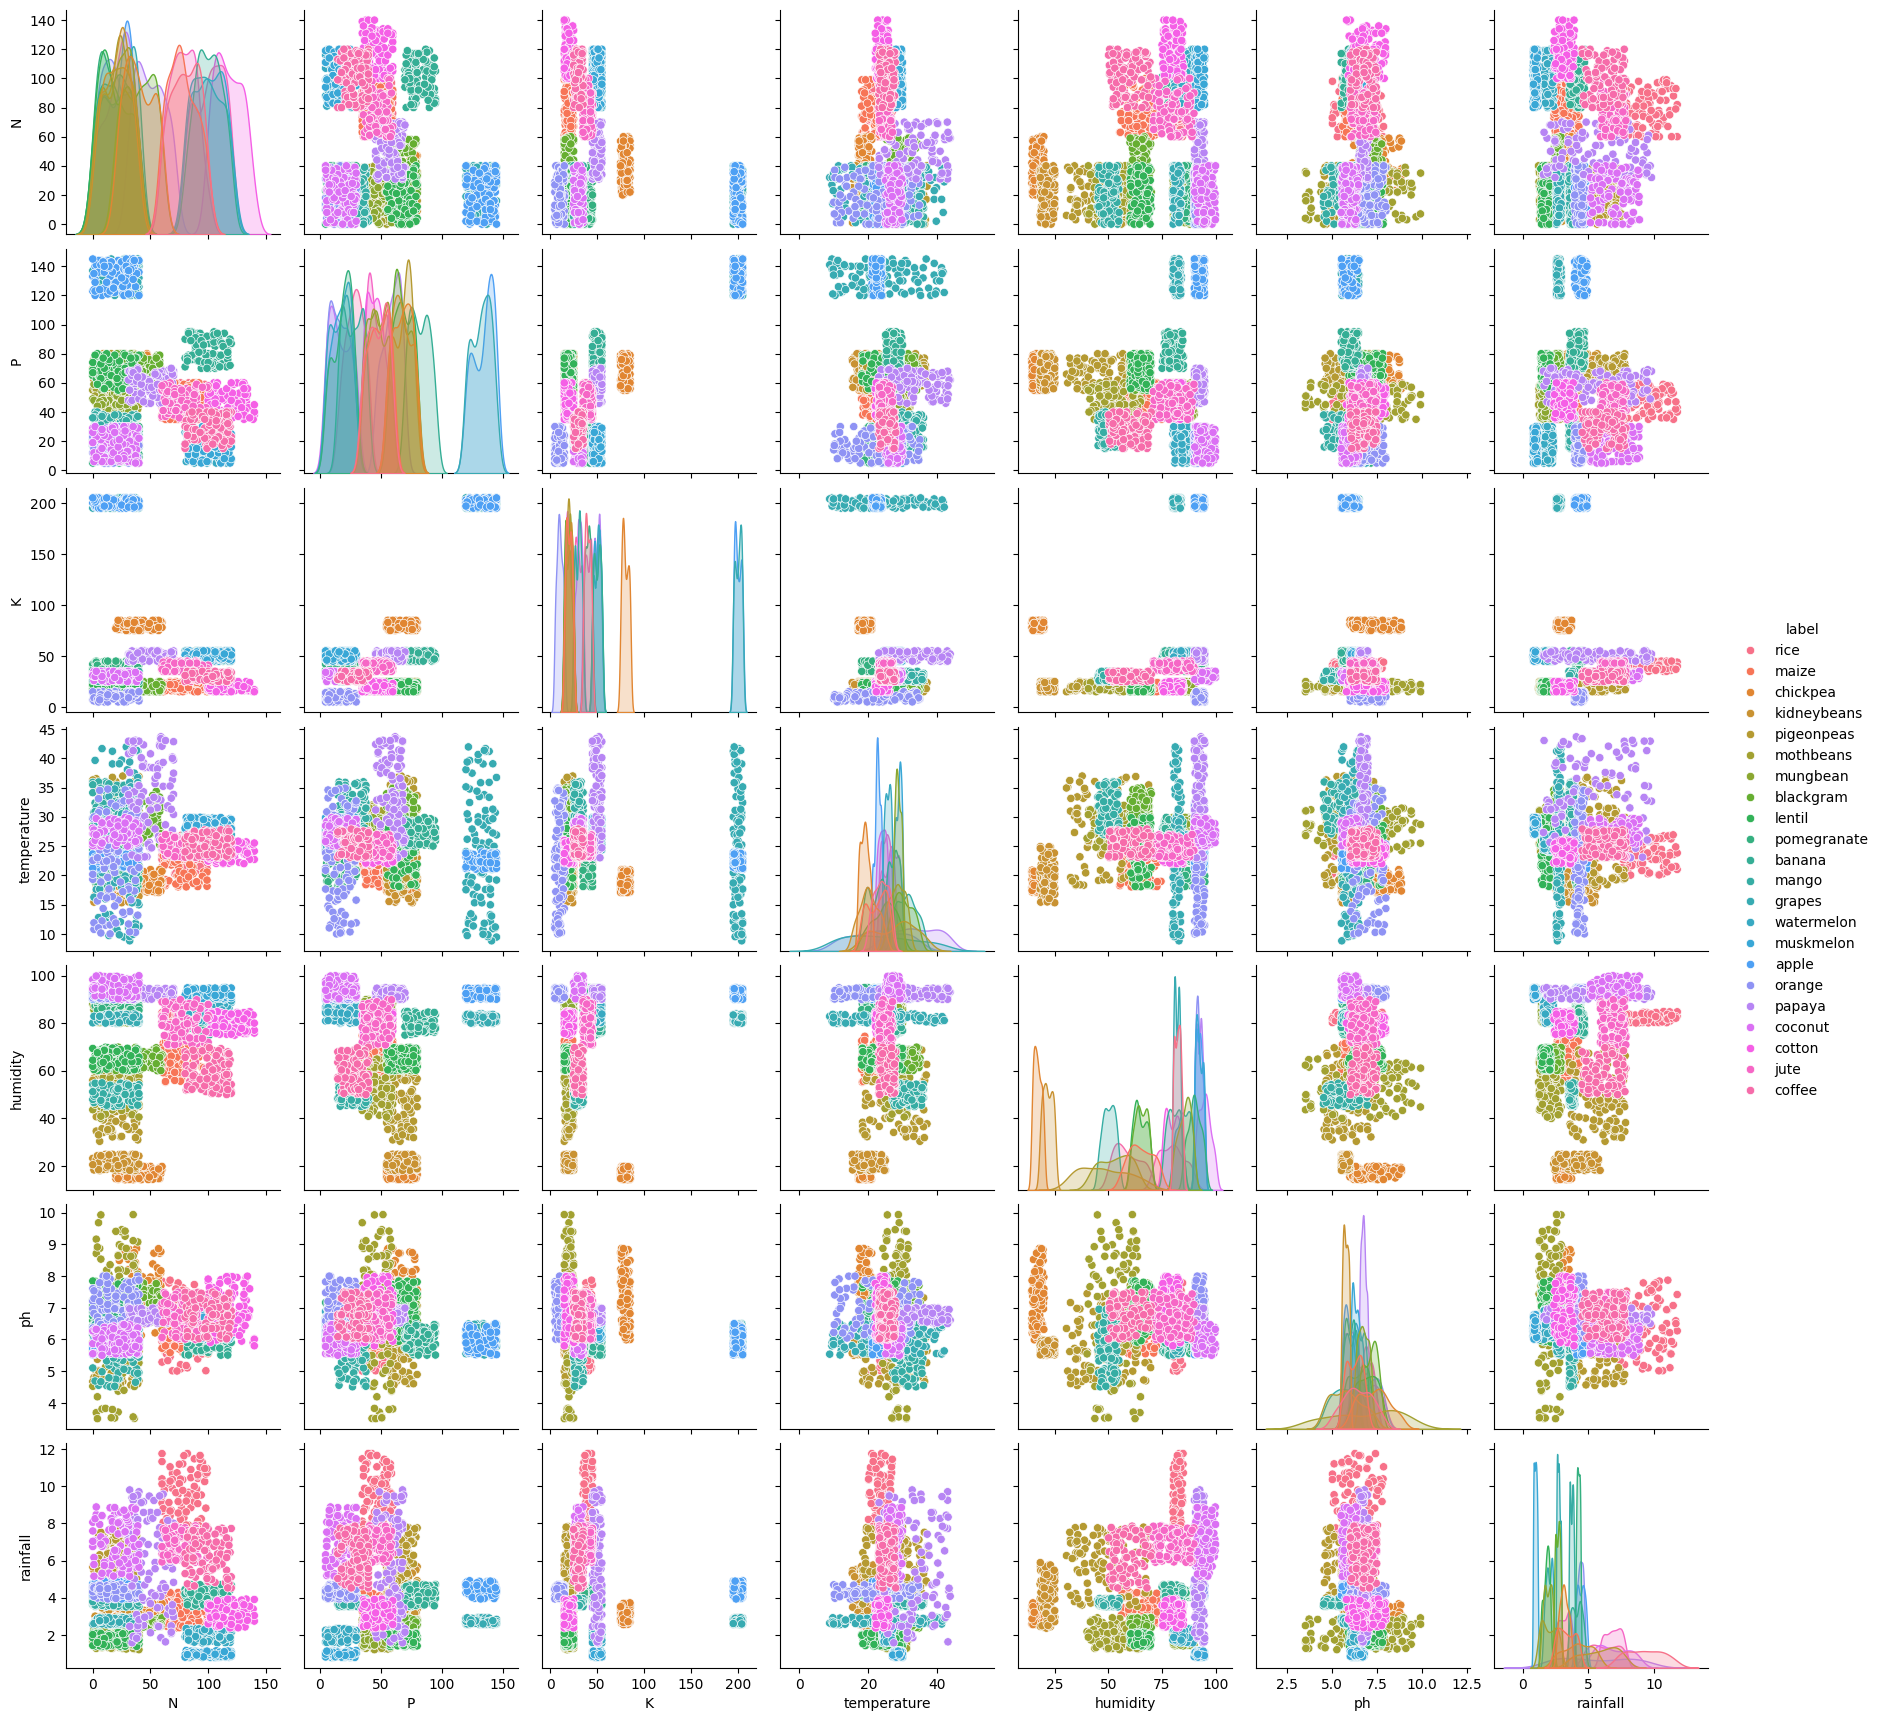

In [22]:
# Data visualization: Pairplot to visualize relationships between variables
sns.pairplot(data, hue='label')
plt.show()

In [23]:
X = data.drop(['label','rainfall'], axis=1)  # Features (all columns except 'label')
y = data['label']               # Target (crop label)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [26]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)


In [28]:
# Make predictions on the test set with probabilities
probabilities = rf_model.predict_proba(X_test)

# Get the class labels (crop names)
crop_classes = rf_model.classes_

# Recommend the top 5 crops for each test sample
top_5_crops_test = []
for prob in probabilities:
    top_indices = np.argsort(prob)[-5:][::-1]  # Get indices of top 5 crops
    top_crops = [(crop_classes[i], prob[i]) for i in top_indices]
    top_5_crops_test.append(top_crops)

# Display a few examples of top 5 crops for test samples
print("Top 5 recommended crops for test set samples:")
for idx, top_crops in enumerate(top_5_crops_test[:5]):  # Show first 5 samples
    print(f"Sample {idx+1}: {top_crops}")


Top 5 recommended crops for test set samples:
Sample 1: [('muskmelon', np.float64(1.0)), ('watermelon', np.float64(0.0)), ('pomegranate', np.float64(0.0)), ('pigeonpeas', np.float64(0.0)), ('papaya', np.float64(0.0))]
Sample 2: [('watermelon', np.float64(1.0)), ('rice', np.float64(0.0)), ('pomegranate', np.float64(0.0)), ('pigeonpeas', np.float64(0.0)), ('papaya', np.float64(0.0))]
Sample 3: [('papaya', np.float64(1.0)), ('watermelon', np.float64(0.0)), ('rice', np.float64(0.0)), ('pomegranate', np.float64(0.0)), ('pigeonpeas', np.float64(0.0))]
Sample 4: [('papaya', np.float64(1.0)), ('watermelon', np.float64(0.0)), ('rice', np.float64(0.0)), ('pomegranate', np.float64(0.0)), ('pigeonpeas', np.float64(0.0))]
Sample 5: [('apple', np.float64(0.99)), ('grapes', np.float64(0.01)), ('pomegranate', np.float64(0.0)), ('pigeonpeas', np.float64(0.0)), ('watermelon', np.float64(0.0))]


In [29]:
# Model evaluation: Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 97.27%


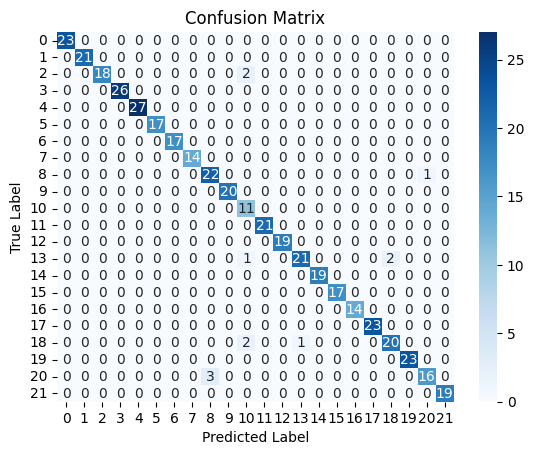

In [34]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [35]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.90      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.88      0.96      0.92        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.69      1.00      0.81        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.95      0.88      0.91        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
    

In [30]:
import pickle
from sklearn.ensemble import RandomForestClassifier  # or whatever model you're using

# After training your RandomForest model, save it using pickle
with open(r'D:\Projects\Project1\jupyter\random_forest_crop_recommendation_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


In [31]:
new_data = {
    'N': [90],         # Nitrogen content in the soil
    'P': [42],         # Phosphorus content in the soil
    'K': [43],         # Potassium content in the soil
    'temperature': [20.87],  # Temperature in Celsius
    'humidity': [82.0],      # Humidity in percentage
    'ph': [6.5],       # pH value of the soil
    # 'rainfall': [5.5] # Rainfall in mm
}
# Convert new data to DataFrame
new_data_df = pd.DataFrame(new_data)

# Make predictions with probabilities for new input
new_probabilities = rf_model.predict_proba(new_data_df)

# Get the class labels (crop names)
crop_classes = rf_model.classes_

# Recommend the top 5 crops for the new input
top_indices = np.argsort(new_probabilities[0])[-3:][::-1]  # Top 5 crops
top_3_crops_new = [(crop_classes[i], new_probabilities[0][i]) for i in top_indices]

# Display the recommended crops
print("Top 3 recommended crops for the given conditions:")
for rank, (crop, prob) in enumerate(top_3_crops_new, 1):
    print(f"{rank}. {crop} (Probability: {prob:.2f})")


Top 3 recommended crops for the given conditions:
1. rice (Probability: 0.96)
2. jute (Probability: 0.04)
3. pomegranate (Probability: 0.00)


In [32]:


# Convert new data to DataFrame
new_data_df = pd.DataFrame(new_data)

# Make the prediction using the loaded model
predicted_crop = rf_model.predict(new_data_df)

# Display the predicted crop
print(f"The recommended crop for the given conditions is: {predicted_crop[0]}")

The recommended crop for the given conditions is: rice
